In [1]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

In [2]:
# Importation des CSV
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
geolocations = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
name_translations = pd.read_csv("product_category_name_translation.csv")

In [98]:
# Merge de tout les tableaux en un grand tableau à 40 colonnes 
data = customers.merge(orders, on = 'customer_id')\
                .merge(items, on = 'order_id')\
                .merge(payments, on = 'order_id')\
                .merge(reviews, on = 'order_id')\
                .merge(products, on = 'product_id')\
                .merge(name_translations, on = 'product_category_name')\
                .merge(sellers, on = 'seller_id')
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,1002.0,3.0,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS
115605,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,660.0,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP
115606,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,942.0,5.0,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201,jau,SP
115607,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,...,923.0,5.0,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

In [6]:
# Conversion du type int en objet 
for feature in ['customer_zip_code_prefix', 'seller_zip_code_prefix']:
    data[feature] = data[feature].astype('object')

In [99]:
# Conversion en type datetime pour le temps en objet
for feature in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']:
    data[feature] = pd.to_datetime(data[feature], errors = 'raise', utc = False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  object        
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

In [10]:
data.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808


In [11]:
# Remove des donnée null
data.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)
data.dropna(axis = 0, inplace = True)

In [12]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_

In [13]:
# Etat de ordre
Order_status = data['order_status'].unique().tolist()
Order_status

['delivered', 'canceled']

In [15]:
(data['order_estimated_delivery_date'] - data['order_delivered_customer_date']).describe()

count                        113193
mean     11 days 09:27:35.216532824
std      10 days 02:13:47.261634898
min             -189 days +00:35:53
25%                 6 days 13:09:53
50%                12 days 01:38:16
75%                16 days 07:42:38
max               146 days 00:23:13
dtype: object

<AxesSubplot:ylabel='Frequency'>

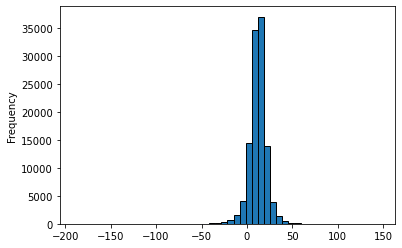

In [16]:
# Temps de livraison moyen entre estimation et réel
((data['order_estimated_delivery_date'] - data['order_delivered_customer_date']) / (np.timedelta64(1, 'D'))).plot(kind='hist', bins=50)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  object        
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

In [20]:
#faire une colonne avec temps moyenne
data['delivery_accuracy'] = ((data['order_estimated_delivery_date'] - data['order_delivered_customer_date'])/ (np.timedelta64(1, 'D')))

In [23]:
# Colonne total pour achat+frais de livraison
data['total_value'] = data['price'].add(data['freight_value'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  object        
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  datetime64[ns]
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

# VIZU

In [26]:
# nombre de catégories avec total de items
data['order_item_id'].value_counts().sort_index()

1     99171
2      9895
3      2287
4       943
5       442
6       250
7        60
8        35
9        28
10       25
11       17
12       12
13        7
14        6
15        4
16        2
17        2
18        2
19        2
20        2
21        1
Name: order_item_id, dtype: int64

<AxesSubplot:xlabel='order_item_id'>

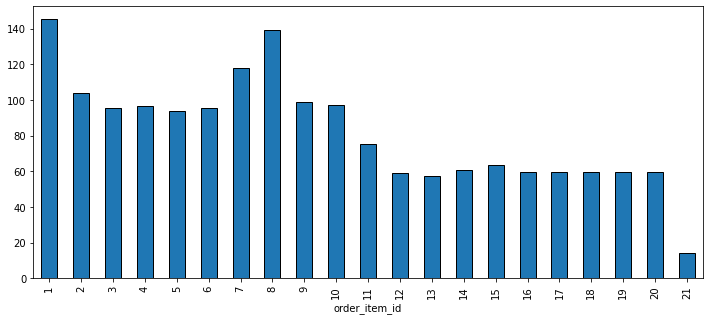

In [32]:
data.groupby('order_item_id')['total_value'].mean().plot(kind='bar',figsize=(12,5))

In [28]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,delivery_accuracy,total_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,10.558623,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,20.993171,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,20.993171,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,16.587454,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP,21.118750,137.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,...,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS,12.453877,314.32
115605,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP,9.413773,31.86
115606,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,...,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201,jau,SP,9.413773,52.77
115607,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,...,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP,12.259190,77.50


In [29]:
data[['price','freight_value']]

,price,freight_value
0,124.99,21.88
1,112.99,24.90
2,112.99,24.90
3,124.99,15.62
4,106.99,30.59
...,...,...
115604,289.49,24.83
115605,19.00,12.86
115606,39.90,12.87
115607,57.90,19.60


(0.0, 600.0)

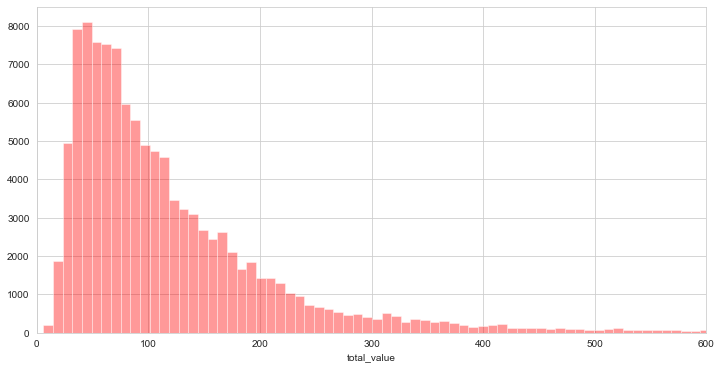

In [36]:
# total ventes
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(data['total_value'], bins=800 ,kde=False, color='r')
plt.xlim([0, 600])

In [37]:
state_grouped = (data.groupby('customer_state')[['price', 'review_score']]
                             .agg({'review_score': ['mean', 'count'], 'price':['mean']})
                ).sort_values(by=('review_score','mean'), ascending=False)
                 
state_grouped.head()

review_score              price
                       mean  count        mean
customer_state                                
AP                 4.280488     82  164.742805
TO                 4.182371    329  165.744043
SP                 4.180394  47812  109.490344
PR                 4.145078   5790  117.657131
MG                 4.121217  13216  119.443892

<AxesSubplot:title={'center':'Customer/Price/review'}, ylabel='customer_state'>

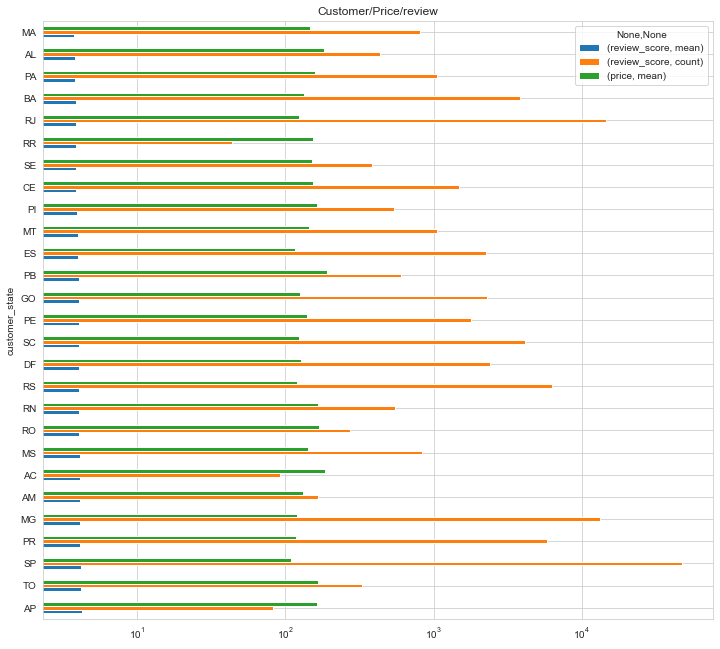

In [40]:
state_grouped.plot(kind='barh', figsize=(12,11), logx=True,title='Customer/Price/review')

<AxesSubplot:title={'center':'Total Volume of Orders in Brazilian Reals Per Month'}, xlabel='order_purchase_timestamp'>

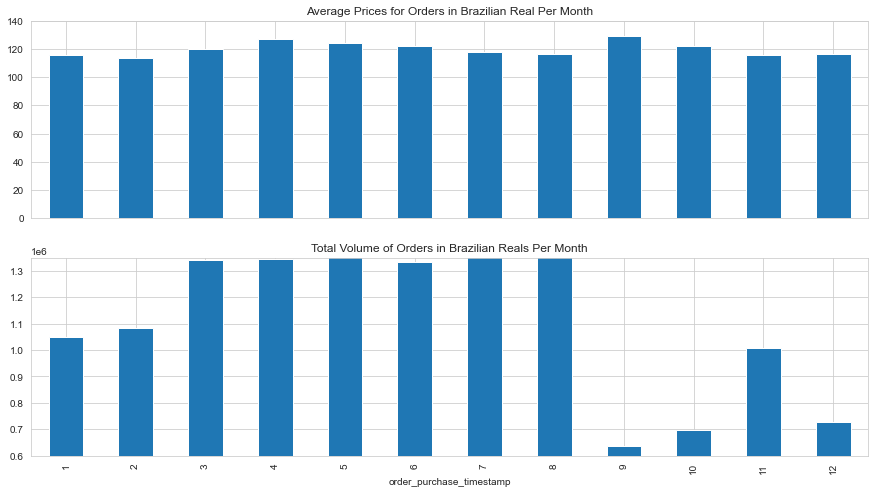

In [49]:
fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(8)
fig.set_figwidth(15)

(data.groupby(data['order_purchase_timestamp'].dt.month)['price'].mean()
      .plot(kind='bar', ax=ax1, ylim=(0,140), 
            title='Average Prices for Orders in Brazilian Real Per Month')
)
(data.groupby(data['order_purchase_timestamp'].dt.month)['price'].sum()
      .plot(kind='bar', ax=ax2, ylim=(600000,1350000), sharex=True,
           title='Total Volume of Orders in Brazilian Reals Per Month')
)

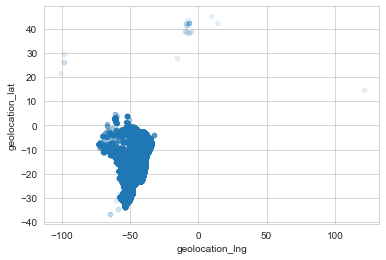

In [56]:
G= geolocations.plot.scatter('geolocation_lng', 'geolocation_lat', alpha=0.1)